# Random Forest Implementation




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# fetch datasets
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
parkinsons = fetch_ucirepo(id=174) 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

In [3]:
# Function to train and evaluate model
def train_evaluate_model(X, y, test_size, split_name, max_features):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    y_train = y_train.squeeze()
    y_test= y_test.squeeze()
    
    rf_model = RandomForestClassifier(n_estimators=1024, max_features=max_features, random_state=42)
    rf_model.fit(X_train, y_train)
    
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n {split_name} Split (Train: {100-test_size*100}% Test: {test_size*100}%)")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    #  confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot  matrix
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format="d")
    plt.title(f'Confusion Matrix - {split_name}')
    plt.show()
    
    return accuracy

splits = {
    "70-30": 0.3,
    "80-20": 0.2,
    "50-50": 0.5
}

max_feature_set = [1, 2, 4, 6, 8, 12, 16, 20]


### Dataset 1: Diabetes

RFC Split Training...

 70-30 Split (Train: 70.0% Test: 30.0%)
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     65605
           1       0.45      0.21      0.29     10499

    accuracy                           0.86     76104
   macro avg       0.67      0.58      0.60     76104
weighted avg       0.82      0.86      0.83     76104



<Figure size 800x600 with 0 Axes>

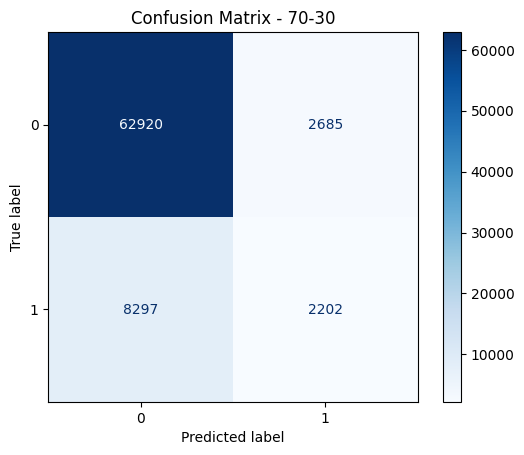

RFC Split Training...

 80-20 Split (Train: 80.0% Test: 20.0%)
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     43739
           1       0.46      0.21      0.29      6997

    accuracy                           0.86     50736
   macro avg       0.67      0.59      0.61     50736
weighted avg       0.83      0.86      0.83     50736



<Figure size 800x600 with 0 Axes>

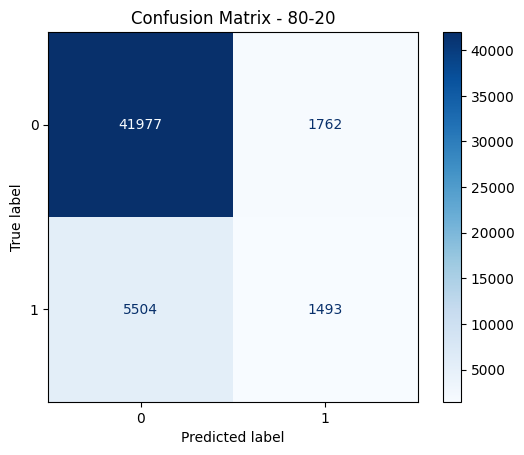

RFC Split Training...

 50-50 Split (Train: 50.0% Test: 50.0%)
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92    109241
           1       0.46      0.21      0.29     17599

    accuracy                           0.86    126840
   macro avg       0.67      0.58      0.60    126840
weighted avg       0.82      0.86      0.83    126840



<Figure size 800x600 with 0 Axes>

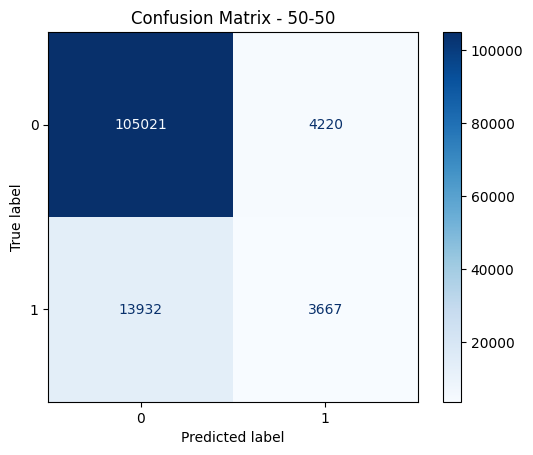


Summary of Results:
70-30 accuracy: 0.86
80-20 accuracy: 0.86
50-50 accuracy: 0.86
Average Accuracy: 0.86


In [8]:
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 


# results = {}
# for split_name, test_size in splits.items():
#     accuracy = train_evaluate_model(X, y, test_size, split_name)
#     results[split_name] = accuracy


# avg_acc = 0
# print("\n Summary of Results")
# for split, acc in results.items():
#     print(f"{split} split accuracy: {acc:.2f}")
#     avg_acc += acc

# avg_acc /= len(results)

# print(f"Average Accuracy: {avg_acc:.2f}")

results = {}

# Evaluate the model for each split and feature set size
for split_name, test_size in splits.items():
    # for max_features in max_feature_set:
        # print(f"Random Forest, Max Features: = {max_features}")
    print(f"RFC Split Training...")
    accuracy = train_evaluate_model(X, y, test_size, split_name, 20)
    results[split_name] = accuracy
        # results[f"{split_name}_max_features_{max_features}"] = accuracy

# Print summary of results
avg_acc = 0
print("\nSummary of Results:")
for split_max_feat, acc in results.items():
    print(f"{split_max_feat} accuracy: {acc:.2f}")
    avg_acc += acc

avg_acc /= len(results)

print(f"Average Accuracy: {avg_acc:.2f}")

### Dataset 2:


 70-30 Split (Train: 70.0% Test: 30.0%)
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        44

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59



<Figure size 800x600 with 0 Axes>

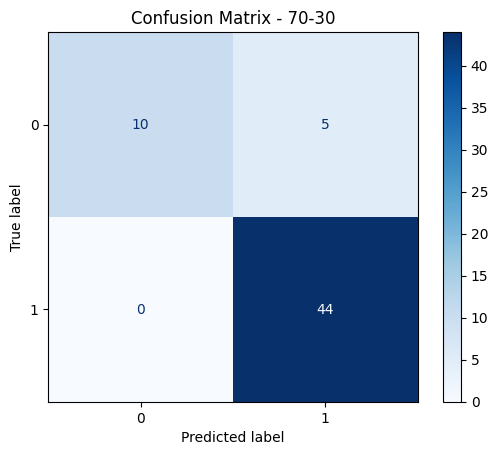


 80-20 Split (Train: 80.0% Test: 20.0%)
Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



<Figure size 800x600 with 0 Axes>

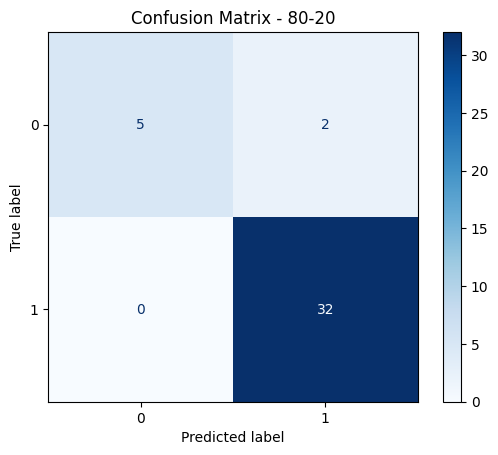


 50-50 Split (Train: 50.0% Test: 50.0%)
Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        23
           1       0.92      0.92      0.92        75

    accuracy                           0.88        98
   macro avg       0.83      0.83      0.83        98
weighted avg       0.88      0.88      0.88        98



<Figure size 800x600 with 0 Axes>

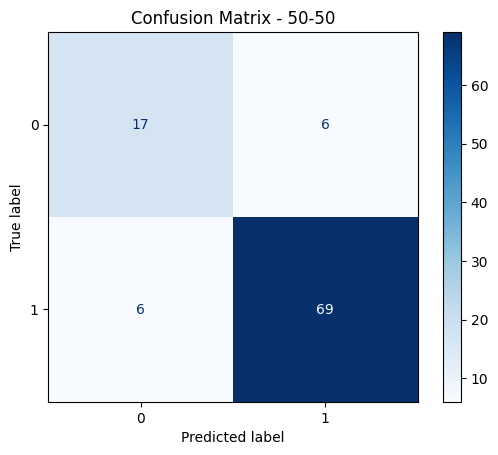


 Summary of Results
70-30 split accuracy: 0.92
80-20 split accuracy: 0.95
50-50 split accuracy: 0.88
Average Accuracy: 0.91


In [6]:
X = parkinsons.data.features 
y = parkinsons.data.targets 
  
results = {}
for split_name, test_size in splits.items():
    accuracy = train_evaluate_model(X, y, test_size, split_name, max_features=20)
    results[split_name] = accuracy

# Print comparison
avg_acc = 0
print("\n Summary of Results")
for split, acc in results.items():
    print(f"{split} split accuracy: {acc:.2f}")
    avg_acc += acc

avg_acc /= len(results.items())

print(f"Average Accuracy: {avg_acc:.2f}")

### Dataset 3:


 70-30 Split (Train: 70.0% Test: 30.0%)
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.93      0.89      0.91       518
    Osmancik       0.91      0.95      0.93       625

    accuracy                           0.92      1143
   macro avg       0.92      0.92      0.92      1143
weighted avg       0.92      0.92      0.92      1143



<Figure size 800x600 with 0 Axes>

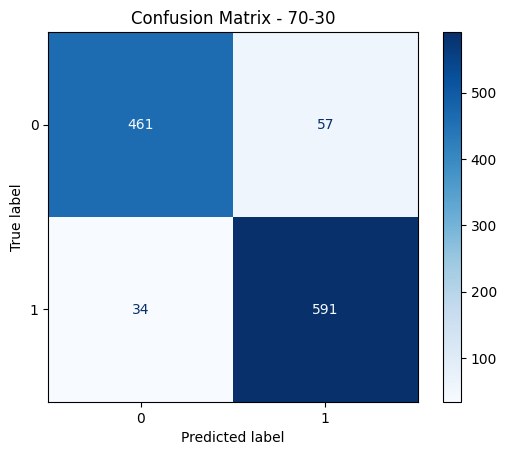


 80-20 Split (Train: 80.0% Test: 20.0%)
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.92      0.89      0.91       350
    Osmancik       0.91      0.94      0.92       412

    accuracy                           0.92       762
   macro avg       0.92      0.91      0.92       762
weighted avg       0.92      0.92      0.92       762



<Figure size 800x600 with 0 Axes>

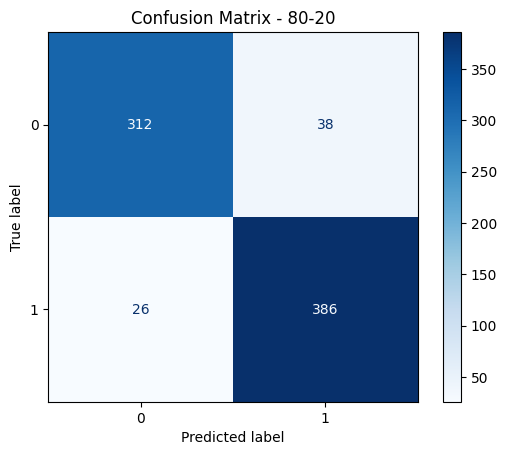


 50-50 Split (Train: 50.0% Test: 50.0%)
Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

      Cammeo       0.94      0.87      0.90       831
    Osmancik       0.90      0.95      0.93      1074

    accuracy                           0.92      1905
   macro avg       0.92      0.91      0.91      1905
weighted avg       0.92      0.92      0.92      1905



<Figure size 800x600 with 0 Axes>

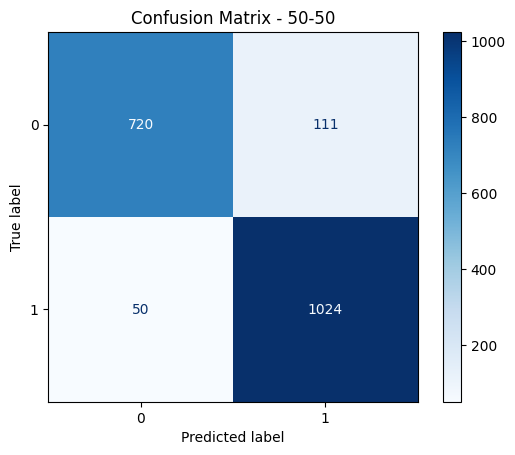


 Summary of Results
70-30 split accuracy: 0.92
80-20 split accuracy: 0.92
50-50 split accuracy: 0.92
Average Accuracy: 0.92


In [7]:
# data (as pandas dataframes) 
X = rice_cammeo_and_osmancik.data.features 
y = rice_cammeo_and_osmancik.data.targets 
  
results = {}
for split_name, test_size in splits.items():
    accuracy = train_evaluate_model(X, y, test_size, split_name, max_features=20)
    results[split_name] = accuracy

# Print comparison
avg_acc = 0
print("\n Summary of Results")
for split, acc in results.items():
    print(f"{split} split accuracy: {acc:.2f}")
    avg_acc += acc

avg_acc /= len(results)

print(f"Average Accuracy: {avg_acc:.2f}")